In [1]:
%load_ext autoreload
%autoreload 2

In [3]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from data_preparation import PoseDataset
from models.resnet_attention import *
import pdb
import matplotlib.pyplot as plt
from pathlib import Path
from pipeline import Trainer
import json

In [ ]:
# Run all configs
configs_path = Path('config_folder')
for conf in configs_path.iterdir():
    if conf.is_file():
        trainer = Trainer(conf)
        trainer.train()

In [5]:
trainer = Trainer('config_folder/vgg16.yaml')

In [6]:
model, history = trainer.train()

Training baselines.VGG16 with parameters:
None
Epoch 1/50: Train Loss = 683.2881, Val Loss = 926.5240
Epoch 2/50: Train Loss = 724.9280, Val Loss = 619.1861
Epoch 3/50: Train Loss = 494.9236, Val Loss = 542.8144
Epoch 4/50: Train Loss = 469.1059, Val Loss = 517.7470
Epoch 5/50: Train Loss = 447.4617, Val Loss = 500.4970
Epoch 6/50: Train Loss = 420.1785, Val Loss = 415.7515
Epoch 7/50: Train Loss = 344.5576, Val Loss = 314.9989
Epoch 8/50: Train Loss = 278.8751, Val Loss = 233.1165
Epoch 9/50: Train Loss = 195.6904, Val Loss = 294.6458
Epoch 10/50: Train Loss = 178.9162, Val Loss = 145.9438
Epoch 11/50: Train Loss = 122.9542, Val Loss = 160.9392
Epoch 12/50: Train Loss = 90.8042, Val Loss = 132.5706
Epoch 13/50: Train Loss = 76.3495, Val Loss = 156.1865
Epoch 14/50: Train Loss = 56.3841, Val Loss = 105.8581
Epoch 15/50: Train Loss = 48.4221, Val Loss = 115.6348
Epoch 16/50: Train Loss = 42.4430, Val Loss = 109.3764
Epoch 17/50: Train Loss = 55.6079, Val Loss = 208.3069
Epoch 18/50: Tra

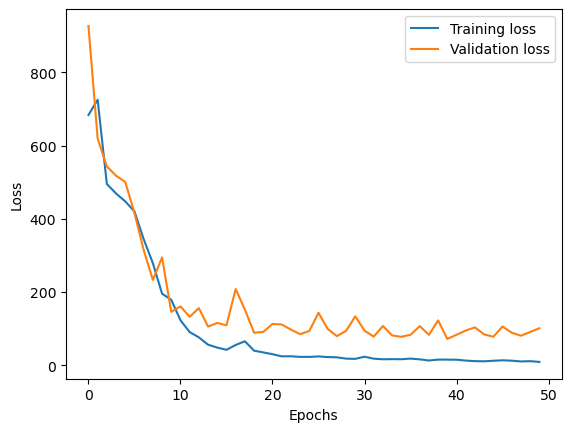

In [7]:
with open('experiments/VGG16_20250520_155837/history.json', 'r') as file:
    history = json.load(file)
    plt.plot(history['train_loss'], label='Training loss')
    plt.plot(history['val_loss'], label='Validation loss')
    plt.legend()
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.show()